# 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 선형대수학 및 통계학
- 평가일 : 21.8.2
- 성명 : 김광훈
- 점수 : 100점

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

Q1. 표준 정규분포의 확률밀도함수를 그래프로 표현하세요.  
x축은 np.arange(-3,3,0.1) 

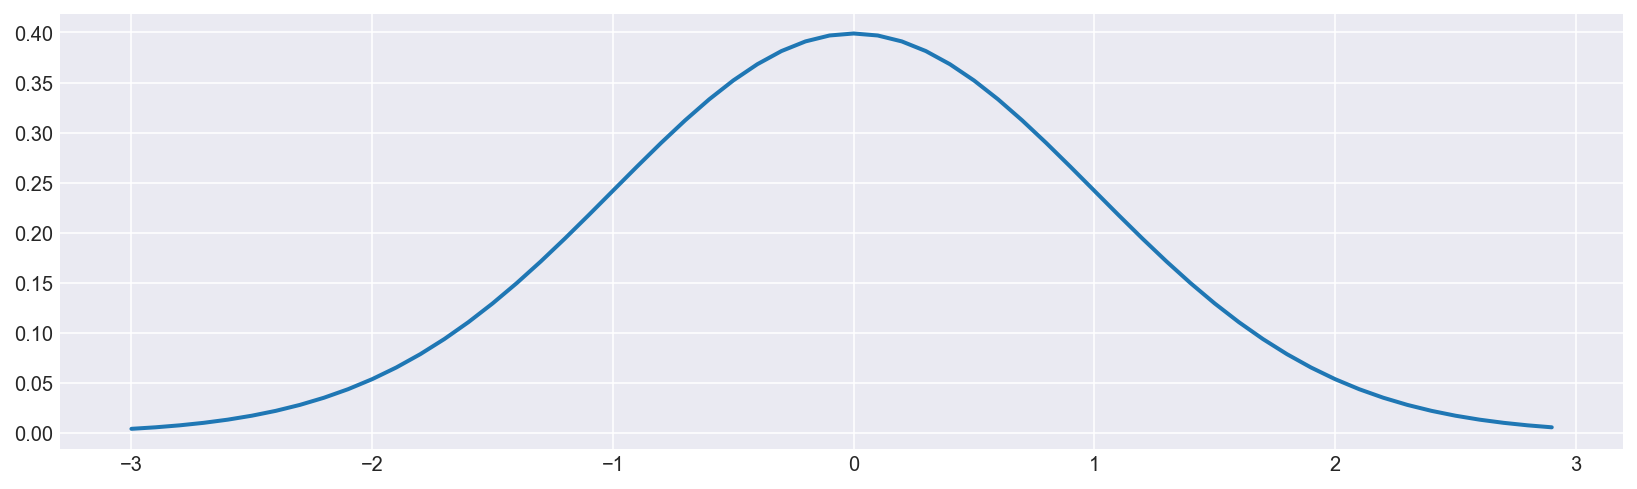

In [2]:
x_axis = np.arange(-3,3,0.1)
plt.plot(x_axis,stats.norm.pdf(x = x_axis))

Q2. 표준 정규분포의 누적분포함수를 그래프로 표현하세요.  
x축 : np.arange(-3,3,0.1)

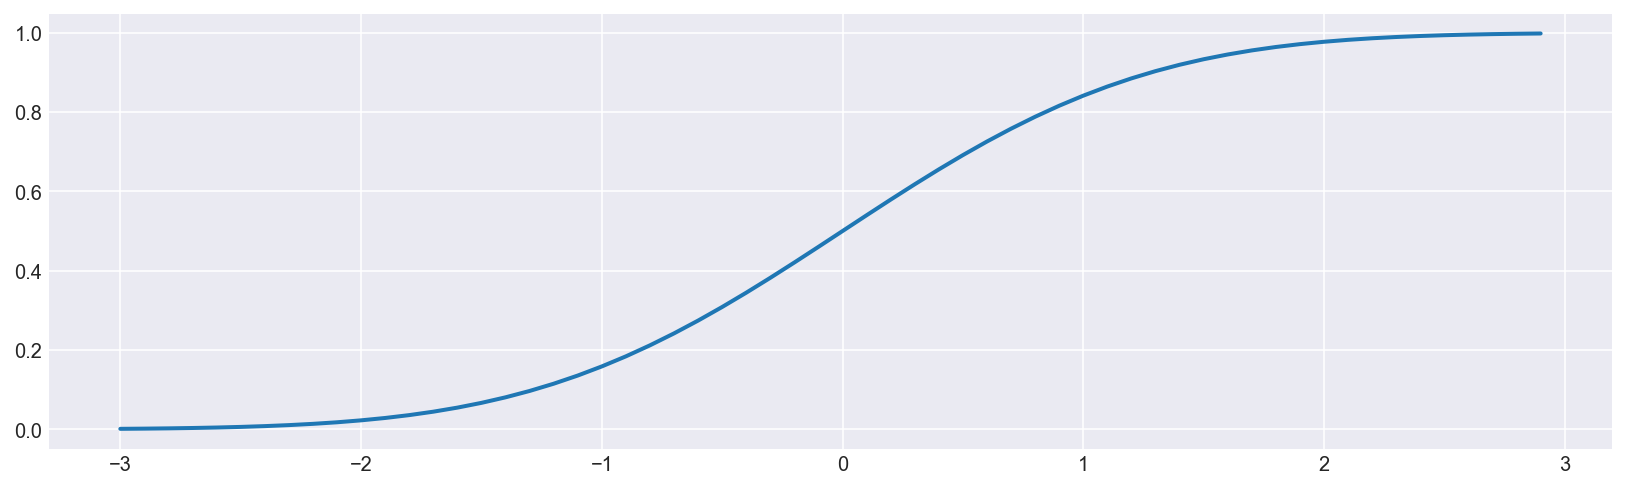

In [3]:
x_axis = np.arange(-3,3,0.1)
plt.plot(x_axis,stats.norm.cdf(x=x_axis))

Q3. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 B, A로 변경하세요.
- df2의 length를 species가 A인 것은 2배로 B인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [4]:
df1 = pd.read_csv('dataset/5_2_fm.csv')
df2 = df1.copy()
df2['species'] = df2['species'].replace({'A':'B','B':'A'})
df2
def change_values(x,y):
    if x == 'A':
        return y * 2
    else:
        return y * 3
df2['length'] = df2.apply(lambda x : change_values(x['species'],x['length']),axis=1)
df = pd.concat([df1,df2])
df_mean = df.groupby('species').mean()
df_std = df.groupby('species').std()
print(df_mean,'\n')
print(df_std)


         length
species        
A           9.5
B           8.5 

           length
species          
A        7.582875
B        2.345208


Q4.평균 4, 표준편차 0.8인 정규분포에서 아래작업을 수행하세요.
- 확률밀도함수에서 x 값이 3 이하가 되는 비율을 구하세요 
- 누적분포함수에서 확률변수가 4 이하가 되는 확률을 구하세요

In [17]:
pdf = stats.norm.pdf(loc=4, scale = 0.8, x=3)
# 3 이하 / 전부를 누적해야하니 x<=3 // cdf 사용해야됨 x = 3으로
cdf = stats.norm.cdf(loc=4, scale = 0.8, x=4)
print('pdf >', pdf)
print('cdf >', cdf)

pdf > 0.2283113567362774
cdf > 0.5


Q5. x축이 x = np.arange(start = -5, stop = 5.1, step = 0.01)이라고 할 때 다음을
수행하세요.
- 표준정규분포 그래프
- 자유도 9인 t분포 그래프
- 자유도 5인 t분포 그래프

'정규분포 /blue'

'자유도 9/orange'

'자유도 5/green'

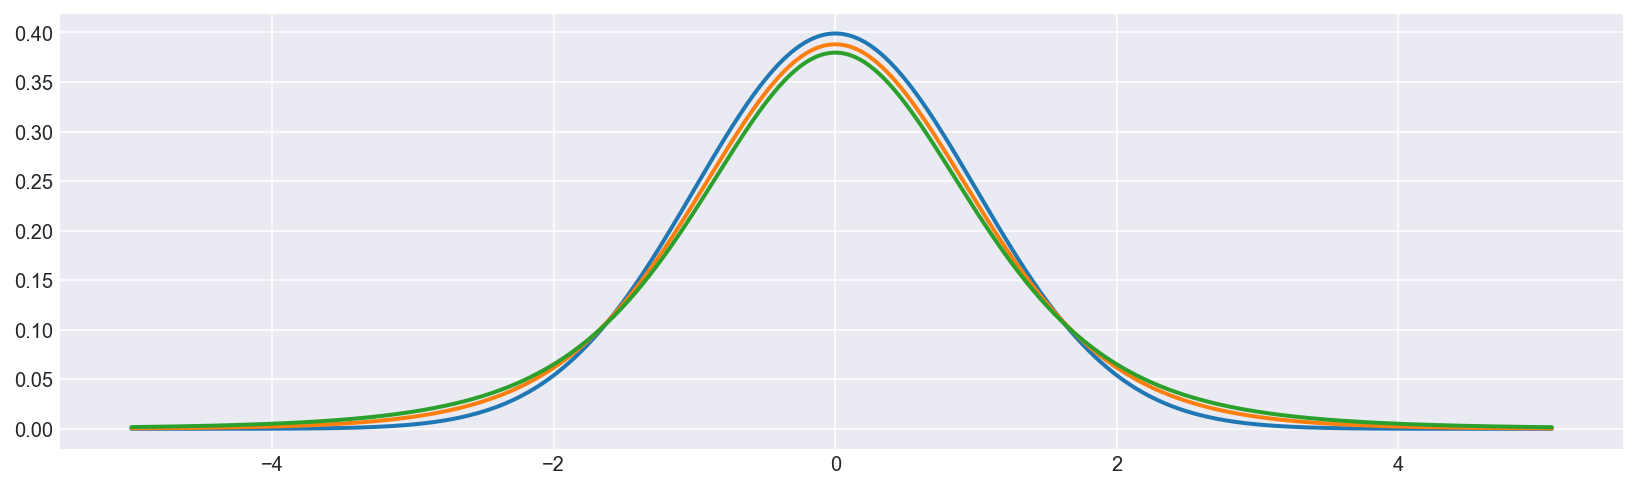

In [6]:
x_axis = np.arange(-5,5.1,0.01)
display('정규분포 /blue', plt.plot(x_axis,stats.norm.pdf(x=x_axis)))
display('자유도 9/orange',plt.plot(x_axis,stats.t.pdf(x=x_axis,df=9)))
display('자유도 5/green', plt.plot(x_axis,stats.t.pdf(x=x_axis,df=5)))

Q6. 'dataset/titanic3.csv'을 불러와서 sex 와 embarked 칼럼을 각각 인덱스, 컬럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요. (단 embarked 컬럼의 null 값을 앞에 있는 값으로 대체 처리 선행)

인사이트
1. 전반적으로 클래스와 상관없이, 여성이 남성보다 생존율이 월등히 높다.
2. embarked C 에서 탑승한 승객들이 Q 와 S 보다 생존율이 높다.


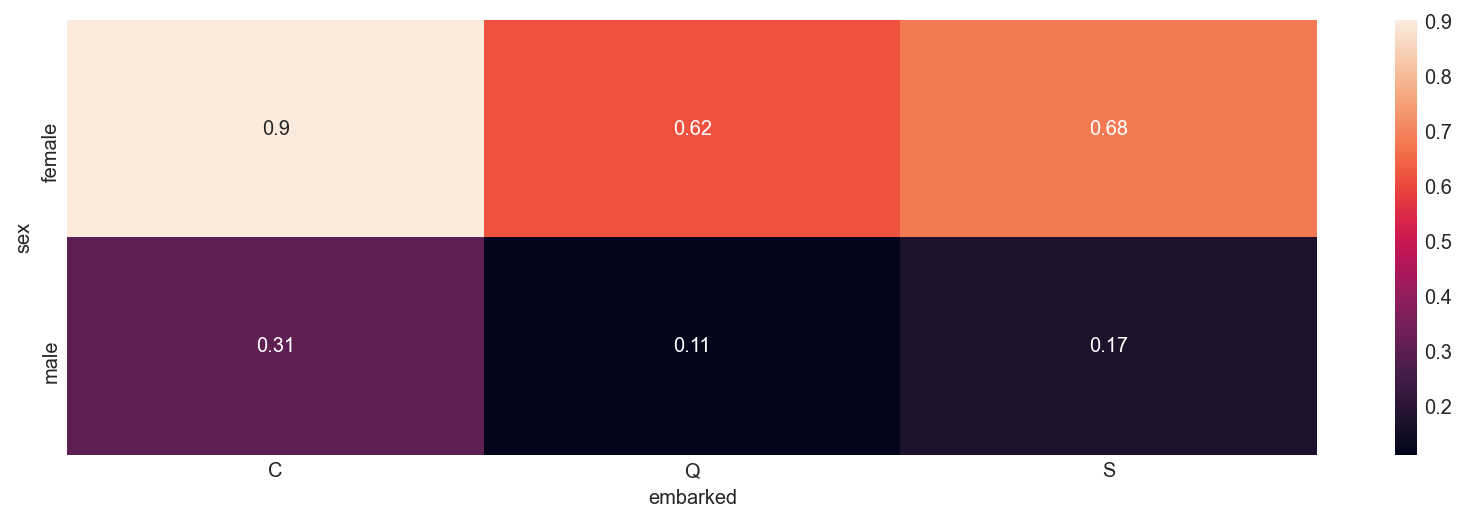

In [7]:
titanic = pd.read_csv('dataset/titanic3.csv')
titanic.head(2)
tdf = titanic.copy()
tdf['embarked'].isnull().sum() # 2개
tdf['embarked'] = tdf['embarked'].fillna('S')
tdf_pivot = pd.pivot_table(data=tdf,index='sex', columns='embarked',values='survived',aggfunc='mean')
sns.heatmap(tdf_pivot,annot=True)
print('인사이트')
print("1. 전반적으로 클래스와 상관없이, 여성이 남성보다 생존율이 월등히 높다.")
print("2. embarked C 에서 탑승한 승객들이 Q 와 S 보다 생존율이 높다.")

Q7. 주어진 3행 3열 배열의 역행렬을 구하고 검증하세요. (검증은 항등행렬을 출력)

In [8]:
np.random.seed(0)
mt1 = np.random.randint(1,4,size=(3,3))
print('mt1 > ','\n', mt1,'\n')
mt2 = np.linalg.inv(mt1)
print('mt2 > ','\n', mt2,'\n')
verify = mt1.dot(mt2)
print('verify > ','\n', verify)


mt1 >  
 [[1 2 1]
 [2 2 3]
 [1 3 1]] 

mt2 >  
 [[ 7. -1. -4.]
 [-1.  0.  1.]
 [-4.  1.  2.]] 

verify >  
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Q8. Q. fish_multi 데이터프레임으로 다음을 수행하세요.
- A, B 두개의 그룹의 Box Plot을 그리고 이상치를 구하세요.
- 이상치를 제거한 후 Box Plot으로 이상치 여부를 확인하세요.
- 바이올린 플롯을 표현하세요.

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A      12
6        A       4
7        A       5
8        A       5
9        A       6
10       B      12
11       B       6
12       B       1
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


'Boxplot>'

<AxesSubplot:xlabel='species', ylabel='length'>

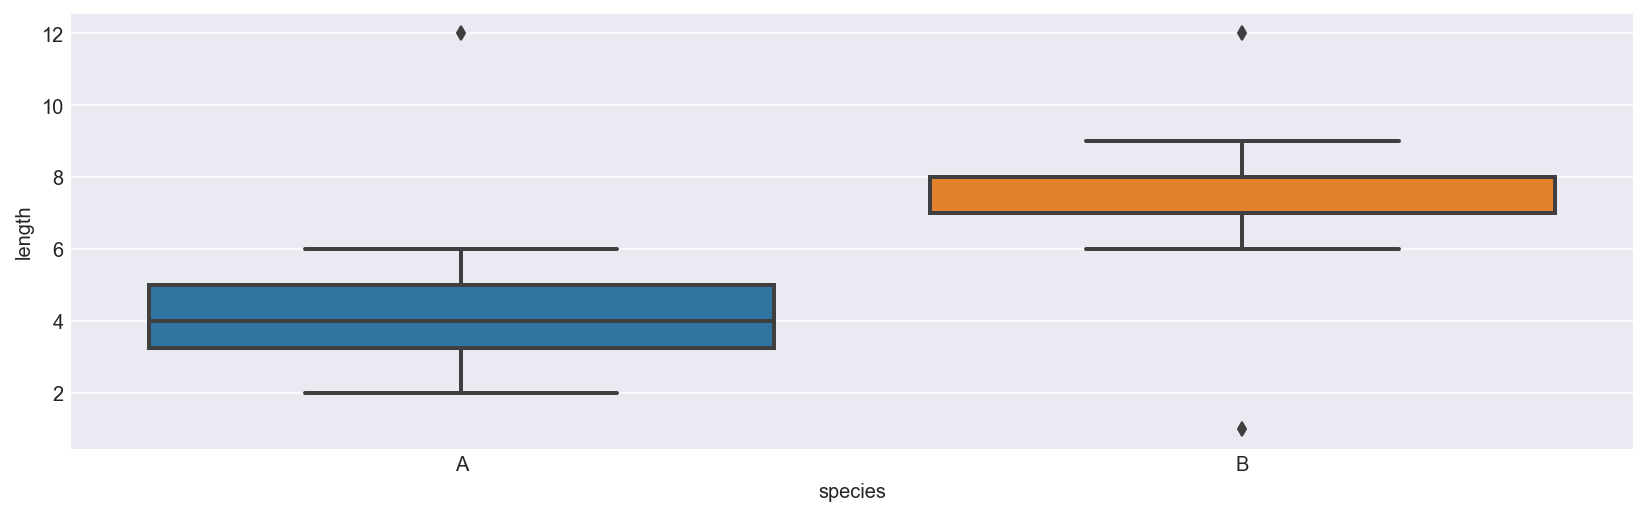

In [9]:
import pandas as pd
fish_multi = pd.read_csv("dataset/4_fm2.csv")
fish_multi.iloc[5,1] = 12
fish_multi.iloc[10,1] = 12
fish_multi.iloc[12,1] = 1
print(fish_multi)

display('Boxplot>', sns.boxplot(data=fish_multi,x='species',y='length'))

groupA = fish_multi.groupby('species').get_group('A')['length']
groupB = fish_multi.groupby('species').get_group('B')['length']

def outliers(x):
    q1,q3 = np.quantile(x,[0.25,0.75])
    iqr = q3-q1
    upper_B = q3 + iqr * 1.5
    lower_B = q1 - iqr * 1.5
    upper_w = x [ x < upper_B ].max()
    lower_w = x [ x > lower_B ].min()
    outliers = x [ ( x > upper_w ) | ( x < lower_w )]
    return outliers 
    
oA = outliers(groupA)
oB = outliers(groupB)
    
fish_multi = fish_multi.drop(oA.index)
fish_multi = fish_multi.drop(oB.index)

'이상치 제거 Boxplot>'

<AxesSubplot:xlabel='species', ylabel='length'>

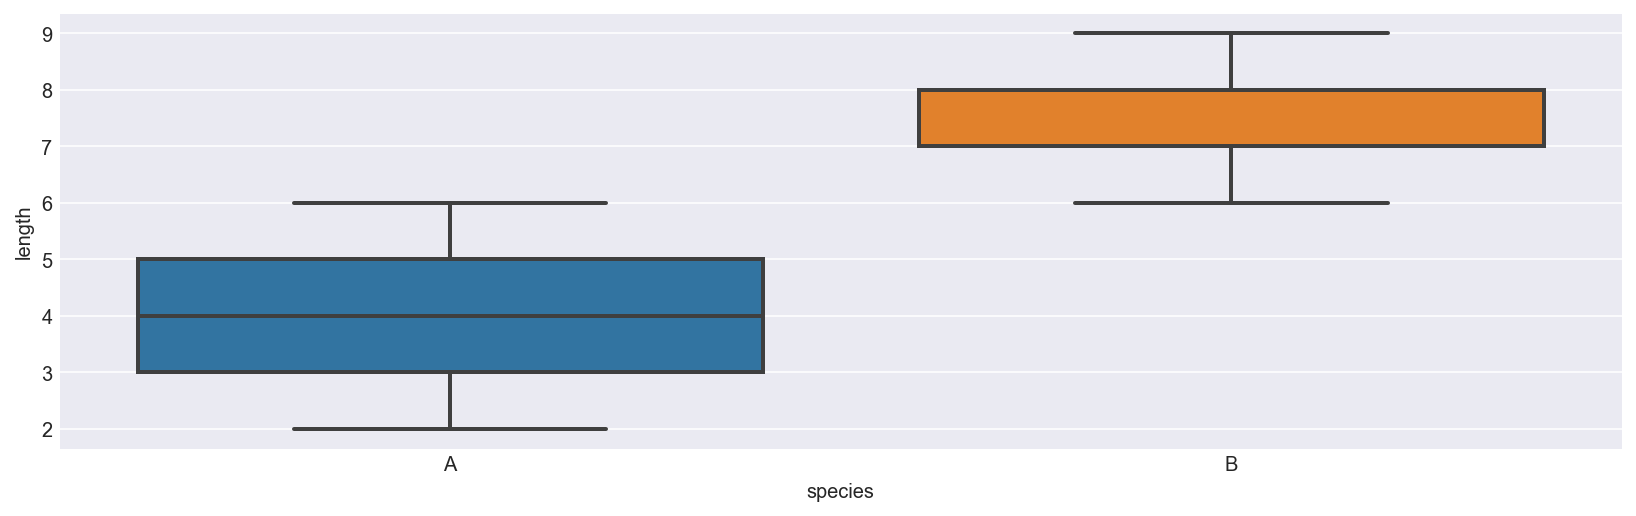

In [10]:
display('이상치 제거 Boxplot>', sns.boxplot(data=fish_multi,x='species',y='length'))

'바이올린 플롯'

<AxesSubplot:xlabel='species', ylabel='length'>

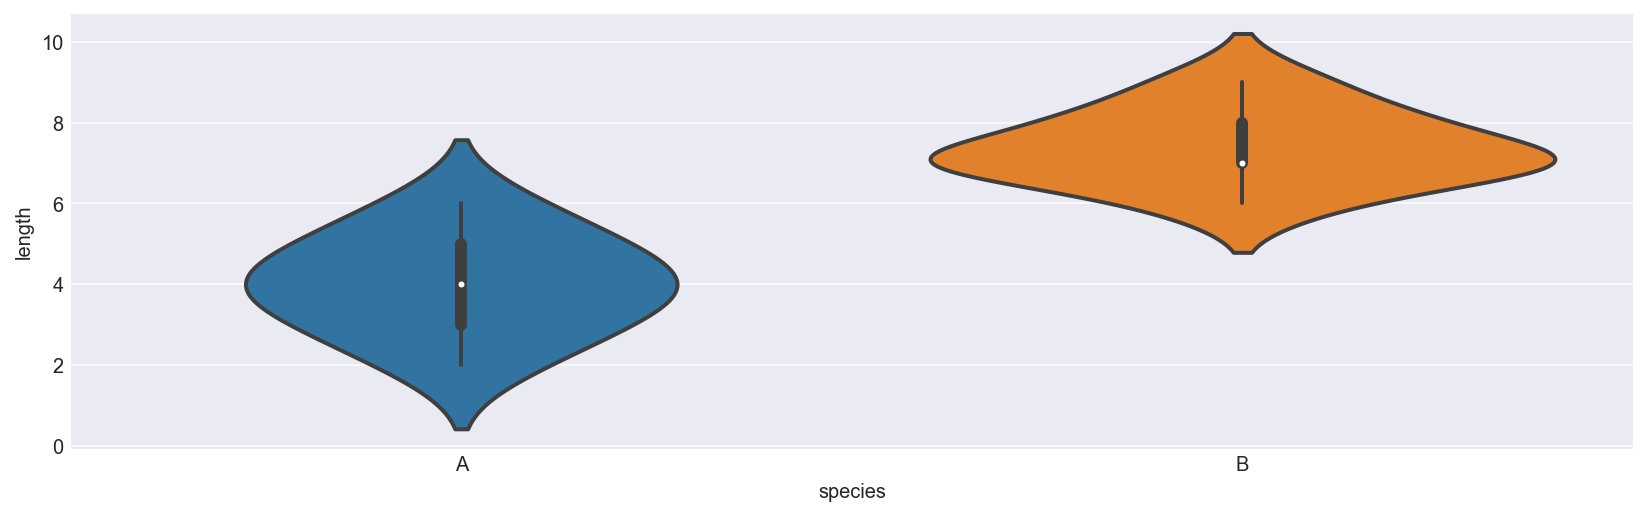

In [11]:
display('바이올린 플롯', sns.violinplot(data=fish_multi,x='species',y='length'))

Q9. df_auto mpg 컬럼과 horsepower 컬럼에 대하여 산점도, 회귀선, 히스토그램을 
하나의 그래프로 표현하여 탐색 후 인사이트를 기술하세요.

인사이트
1. 연비, mpg값이 높을 수록 마력, horsepower의 값이 낮다.
2. 즉, 연비가 높을 수록 마력은 증가하여 더 높은 성능을 의미한다.


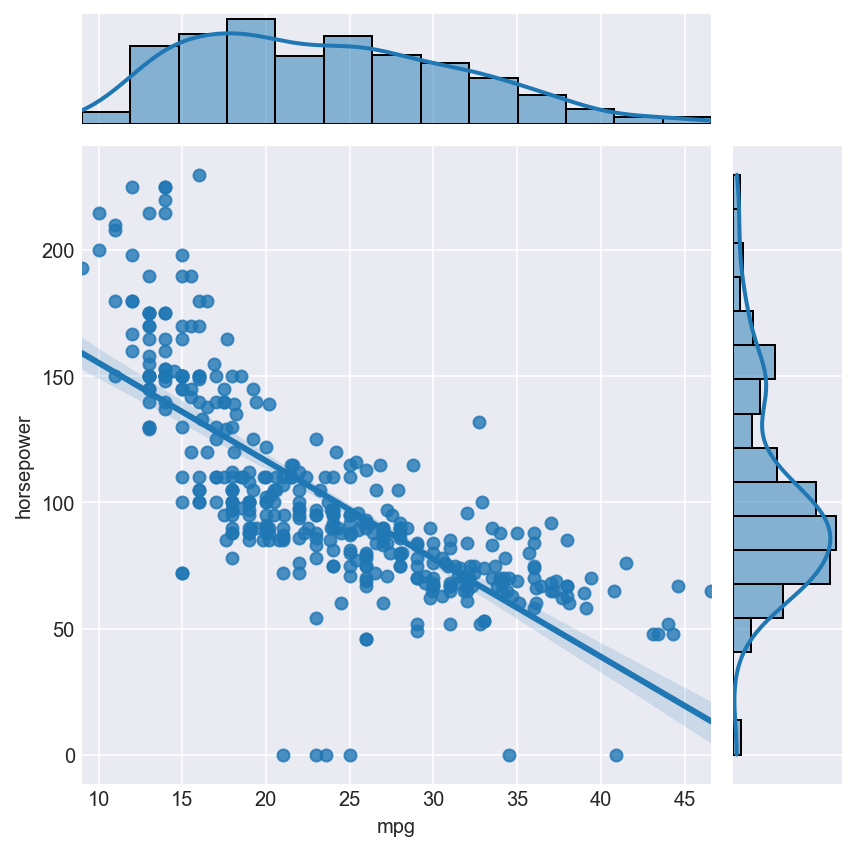

In [12]:
import pandas as pd
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()
df_auto['horsepower'].unique()
df_auto['horsepower'] = df_auto['horsepower'].replace('?',0)
# np.nan,=inplcae=True / float형태로 변환.

import warnings
warnings.filterwarnings('ignore')
sns.jointplot('mpg','horsepower',data=df_auto,kind='reg')

print('인사이트')
print("1. 연비, mpg값이 높을 수록 마력, horsepower의 값이 낮다.")
print("2. 즉, 연비가 높을 수록 마력은 증가하여 더 높은 성능을 의미한다.")

Q10. FIFA 데이터셋을 불러와서 다음 사항을 수행하세요.
- 각 선수의 키는 Height변수에 피트와 인치로 입력되어 있습니다. 
이를 cm로 변환하여 새로운 변수 Height_cm을 생성하고 통계요약표를 구하세요
( “ ' ” 앞의 숫자는 피트이며, “ ' ” 뒤의 숫자는 인치, 1피트 = 30cm, 1인치 = 2.5cm)
- 포지션을 의미하는 Position변수를 아래 표를 참고하여 “Forward”, “Midfielder”,“Defender”, “GoalKeeper”로 재범주화하고, 변환하여 Position_Class 라는 변수를 생성하고 각 그룹별 Value의 평균을 구하세요.
    - Forward : ['LS','ST','RS','LW','LF','CF','RF','RW']
    - Midfielder : ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']
    - Defender : ['LBW','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
    - GoalKeeper

In [20]:
import pandas as pd
import numpy as np

data = pd.read_csv('./dataset/FIFA.csv',engine='python')
data.head()

#Height
def change_height(x):
    a,b = map(int,x.split("'"))
    return a * 30 + b * 2.5
data['Height_cm'] = data['Height'].agg(change_height)
print('Height_cm > ' , data['Height_cm'].describe())

#Position
data['Position'].unique()
def cat_position(x):
    cat = ''
    if x in ['LS','ST','RS','LW','LF','CF','RF','RW']:
        cat = 'Forward'
    elif x in ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']:
        cat = 'Midfielder'
    elif x in ['LBW','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']:
        cat = 'Defender'
    else:
        cat = 'GoalKeeper'
    return cat
data['Position_Class'] = data['Position'].agg(cat_position)
Position_group = data.groupby('Position_Class').mean()
display('Postion_group_value_mean >' , Position_group)

Height_cm >  count    16642.000000
mean       178.393973
std          6.606026
min        152.500000
25%        172.500000
50%        177.500000
75%        182.500000
max        202.500000
Name: Height_cm, dtype: float64


'Postion_group_value_mean >'

,ID,Age,Overall,Jersey_Number,Contract_Valid_Until,Weight_lb,Release_Clause,Value,Wage,Height_cm
Position_Class,,,,,,,,,,
Defender,213137.403918,25.633318,66.559145,17.814715,2020.227157,167.857335,3958.556303,2104.697174,9.377449,179.325931
Forward,215679.094941,24.783509,66.254599,22.101183,2020.302891,165.743758,5670.227332,3035.026281,11.448095,177.945959
GoalKeeper,207972.827429,26.070344,64.531883,20.468623,2020.119939,179.904352,3032.167004,1616.634615,6.800101,184.822874
Midfielder,216027.369605,24.608105,66.220061,20.323404,2020.270922,158.034043,5386.012158,2865.531915,9.944681,174.833333
